In [1]:
#the logistic map

In [37]:
import pynamical
from pynamical import simulate, bifurcation_plot, save_fig
import pandas as pd, numpy as np, IPython.display as display, matplotlib.pyplot as plt, matplotlib.cm as cm

In [38]:
title_font = pynamical.get_title_font()
label_font = pynamical.get_label_font()

In [39]:
# run the logistic model for 20 generations for 7 growth rates between 0.5 and 3.5 then view the output
pops = simulate(num_gens=30, rate_min=0.5, rate_max=3.5, num_rates=6)
pops.applymap(lambda x: '{:03.3f}'.format(x))

,0.5,1.1,1.7,2.3,2.9,3.5
0,0.500,0.500,0.500,0.500,0.500,0.500
1,0.125,0.275,0.425,0.575,0.725,0.875
2,0.055,0.219,0.415,0.562,0.578,0.383
3,0.026,0.188,0.413,0.566,0.707,0.827
4,0.013,0.168,0.412,0.565,0.600,0.501
5,0.006,0.154,0.412,0.565,0.696,0.875
6,0.003,0.143,0.412,0.565,0.614,0.383
7,0.002,0.135,0.412,0.565,0.687,0.827
8,0.001,0.128,0.412,0.565,0.623,0.501
9,0.000,0.123,0.412,0.565,0.681,0.875


In [40]:
######
######   System Behavior and Attractors

In [41]:
def get_colors(cmap, n, start=0., stop=1., alpha=1., reverse=False):
    '''return n-length list of rgba colors from the passed colormap name and alpha,
       limit extent by start/stop values and reverse list order if flag is true'''
    colors = [cm.get_cmap(cmap)(x) for x in np.linspace(start, stop, n)]
    colors = [(c, r, m, alpha) for c, r,m, _ in colors]
    return list(reversed(colors)) if reverse else colors

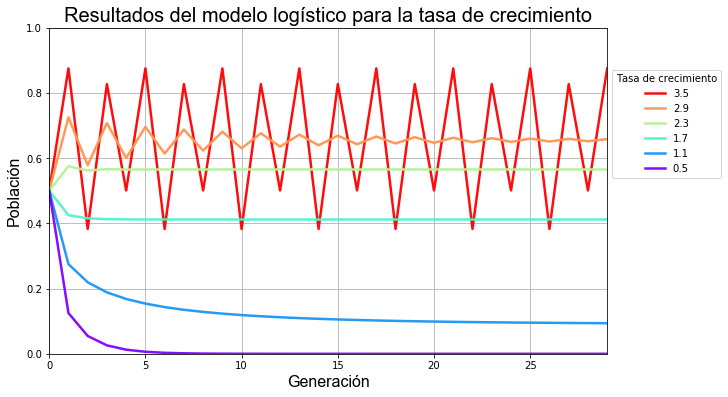

In [42]:

# plot the results of the logistic map run for these 7 different growth rates
#color_list = ['#cc00cc', '#4B0082', '#0066cc', '#33cc00', '#cccc33', '#ff9900', '#ff0000']
color_list = get_colors('rainbow', n=len(pops.columns), start=0., stop=1)
for color, rate in reversed(list(zip(color_list, pops.columns))):
    ax = pops[rate].plot(kind='line', figsize=[10, 6], linewidth=2.5, alpha=0.95, c=color)
ax.grid(True)
ax.set_ylim([0, 1])
ax.legend(title='Tasa de crecimiento', loc=3, bbox_to_anchor=(1, 0.525))
ax.set_title('Resultados del modelo logístico para la tasa de crecimiento', fontproperties=title_font)
ax.set_xlabel('Generación', fontproperties=label_font)
ax.set_ylabel('Población', fontproperties=label_font)

save_fig('logistic-map-growth-rates')
plt.show()

In [8]:
#################3
#################      Bifurcations and the Path to Chaos

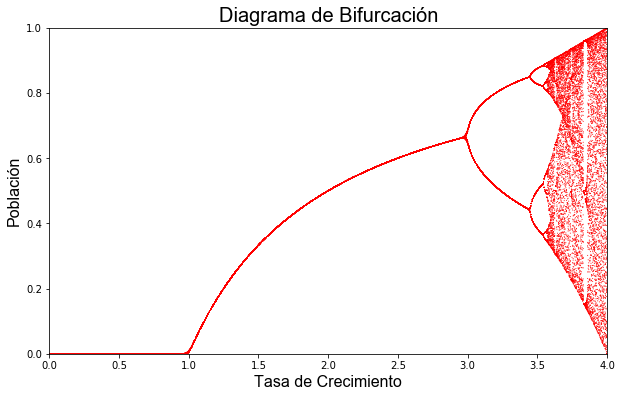

In [9]:

# plot the bifurcation diagram for 200 generations, but this time throw out the first 100 rows
# 200-100=100, so we still have 100 generations in the plot, just like in the previous cell
# this will show us only the attractors (aka, the values that each growth rate settles on over time)
pops = simulate(num_gens=100, rate_min=0, rate_max=4, num_rates=1000, num_discard=100)
bifurcation_plot(pops, filename='logistic-map-bifurcation-1',color="r",xlabel='Tasa de Crecimiento', ylabel='Población', title='Diagrama de Bifurcación')

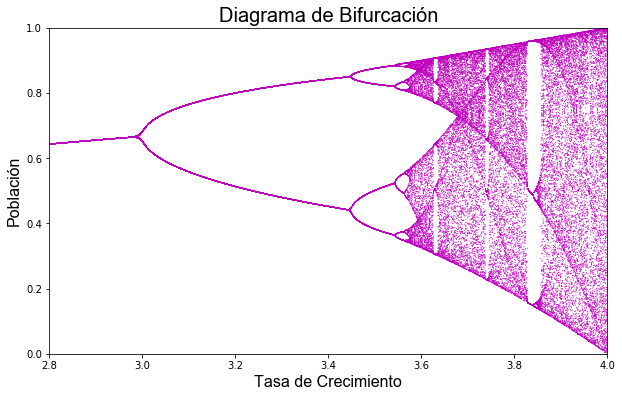

In [10]:
# run the model for 300 generations across 1,000 growth rate steps from 2.8 to 4, and plot the bifurcation diagram
# this plot is a zoomed-in look at the first plot and shows the period-doubling path to chaos
pops = simulate(num_gens=100, rate_min=2.8, rate_max=4, num_rates=1000, num_discard=200, initial_pop=0.1)
bifurcation_plot(pops, xmin=2.8, xmax=4, filename='logistic-map-bifurcation-2',color="m",xlabel='Tasa de Crecimiento', ylabel='Población', title='Diagrama de Bifurcación')

In [11]:
################
#################   The Onset of chaos

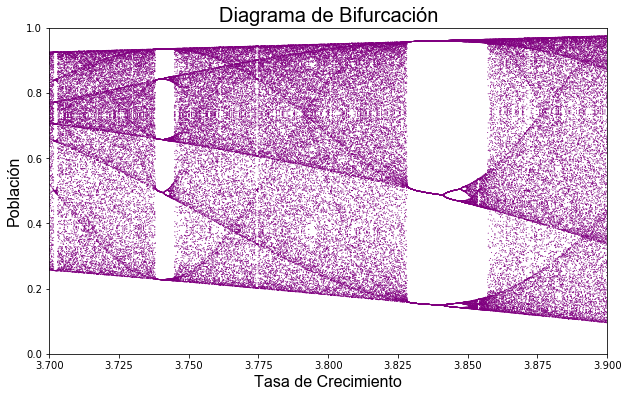

In [12]:
# run the model for 200 generations across 1,000 growth rate steps from 3.7 to 3.9, and plot the bifurcation diagram
# this plot is a zoomed-in look at the first plot and shows more detail in the chaotic regimes
pops = simulate(num_gens=100, rate_min=3.7, rate_max=3.9, num_rates=1000, num_discard=100)
bifurcation_plot(pops, xmin=3.7, xmax=3.9, filename='logistic-map-bifurcation-3',color="purple",xlabel='Tasa de Crecimiento', ylabel='Población', title='Diagrama de Bifurcación')

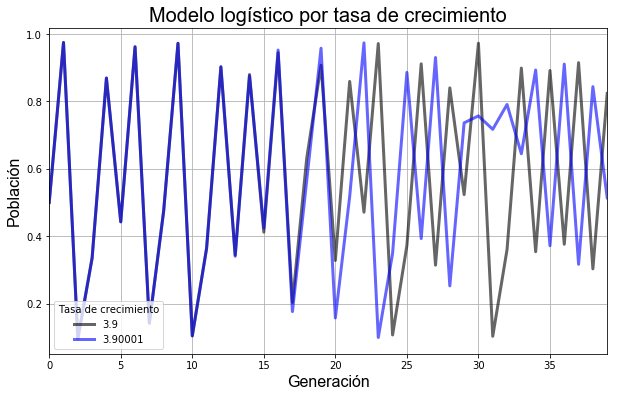

In [13]:
# plot the numeric output of the logistic model for growth rates of 3.9 and 3.90001
# this demonstrates sensitive dependence on the parameter


rate1 = 3.9
rate2 = rate1 + 0.00001

pops = simulate(num_gens=40, rate_min=rate1, rate_max=rate2, num_rates=2)
ax = pops.plot(kind='line', figsize=[10, 6], linewidth=3, alpha=0.6, style=['#000000','blue'])
ax.grid(True)

ax.set_title('Modelo logístico por tasa de crecimiento', fontproperties=title_font)
ax.set_xlabel('Generación', fontproperties=label_font)
ax.set_ylabel('Población', fontproperties=label_font)
ax.legend(title='Tasa de crecimiento', loc=3)

save_fig('logistic-map-parameter-sensitivity')
plt.show()

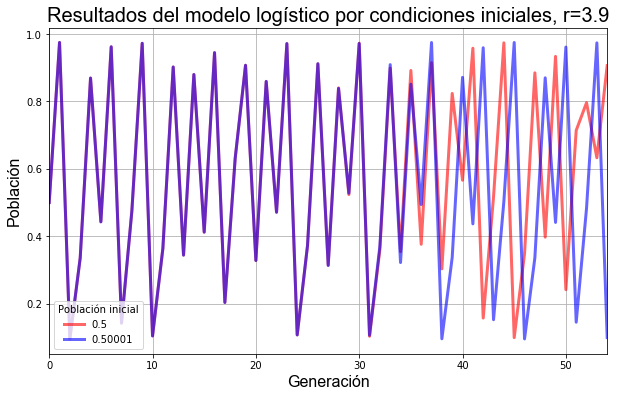

In [17]:
# plot the numeric output of the logistic model at growth rate 3.9 for 2 similar starting population values
# this demonstrates sensitive dependence on initial conditions, as they diverge through chaos
r = 3.9
pops1 = simulate(num_gens=55, rate_min=r, rate_max=4.0, num_rates=1, initial_pop=0.5)
pops2 = simulate(num_gens=55, rate_min=r, rate_max=4.0, num_rates=1, initial_pop=0.50001)
pops = pd.concat([pops1, pops2], axis=1)
pops.columns = ['0.5', '0.50001']
ax = pops.plot(kind='line', figsize=[10, 6], linewidth=3, alpha=0.6, style=['red','blue'])
ax.grid(True)
ax.set_title('Resultados del modelo logístico por condiciones iniciales, r={}'.format(r), fontproperties=title_font)
ax.set_xlabel('Generación', fontproperties=label_font)
ax.set_ylabel('Población', fontproperties=label_font)
ax.legend(title='Población inicial', loc=3)

save_fig('logistic-map-initial-conditions')
plt.show()

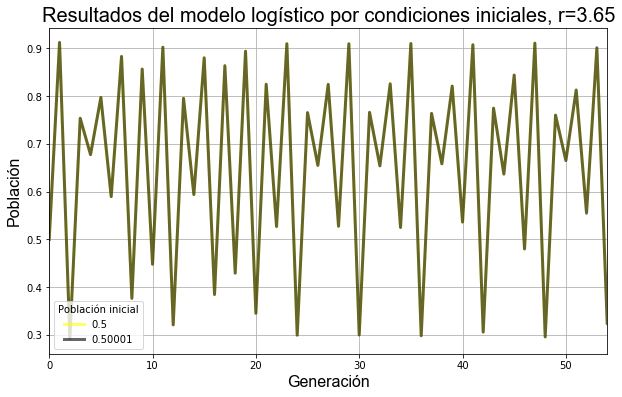

In [18]:
# plot the numeric output of the logistic model at growth rate 3.65 for 2 similar starting population values
# this demonstrates how very similar conditions do not diverge when the rate is not chaotic

r = 3.65
pops1 = simulate(num_gens=55, rate_min=r, num_rates=1, initial_pop=0.5)
pops2 = simulate(num_gens=55, rate_min=r, num_rates=1, initial_pop=0.50001)
pops = pd.concat([pops1, pops2], axis=1)
pops.columns = ['0.5', '0.50001']
ax = pops.plot(kind='line', figsize=[10, 6], linewidth=3, alpha=0.6, style=['yellow','black'])
ax.grid(True)
ax.set_title('Resultados del modelo logístico por condiciones iniciales, r={}'.format(r), fontproperties=title_font)
ax.set_xlabel('Generación', fontproperties=label_font)
ax.set_ylabel('Población', fontproperties=label_font)
ax.legend(title='Población inicial', loc=3)

save_fig('logistic-map-initial-conditions-stable')
plt.show()

In [19]:
##################3
############33##### fractals and strange attractors

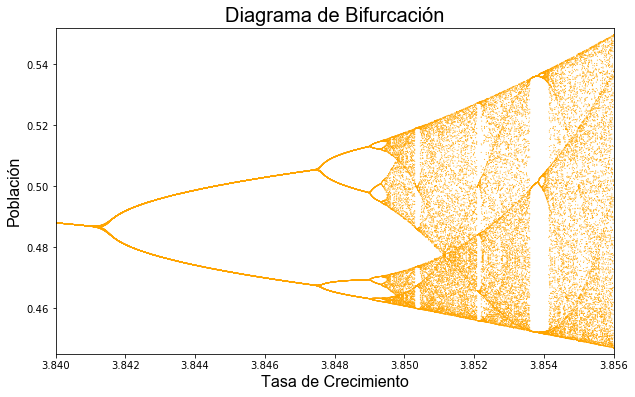

In [20]:
# run the model for 500 generations across 1,000 growth rate steps from 3.84 to 3.856, and plot the bifurcation diagram
# throw out the first 300 generations, so we end up with 200 generations in the plot
# this plot is a zoomed-in look at the first plot and shows the same structure we saw at the macro-level
pops = simulate(num_gens=200, rate_min=3.84, rate_max=3.856, num_rates=1000, num_discard=300)
bifurcation_plot(pops, xmin=3.84, xmax=3.856, ymin=0.445, ymax=0.552, filename='logistic-map-bifurcation-4',color="orange",xlabel='Tasa de Crecimiento', ylabel='Población', title='Diagrama de Bifurcación')

In [21]:
#######################################3
######################################33       

In [22]:
import pynamical
from pynamical import simulate, save_fig, phase_diagram, phase_diagram_3d
import pandas as pd, numpy as np, matplotlib.pyplot as plt, IPython.display as IPdisplay
%matplotlib inline

In [23]:
title_font = pynamical.get_title_font()
label_font = pynamical.get_label_font()

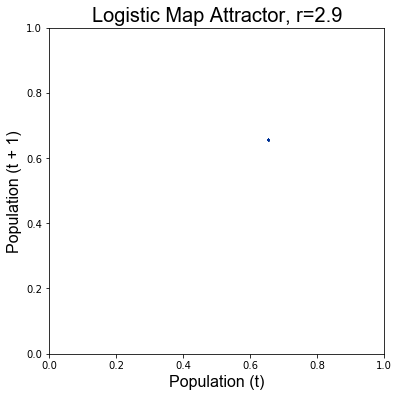

In [24]:
# draw a phase diagram for 100 generations for the growth rate parameter 2.9
# it shows points converging on 0.655 because the logistic map has a fixed-point attractor at 0.655 when r=2.9
pops = simulate(num_gens=100, rate_min=2.9, num_rates=1, num_discard=100)
phase_diagram(pops, title='Logistic Map Attractor, r=2.9', size=20)

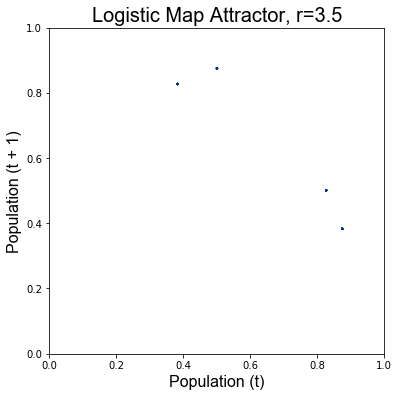

In [25]:
# draw a phase diagram for 100 generations for the growth rate parameter 3.5
# it shows 4 points because the logistic map has a period of 4 when r=3.5
pops = simulate(num_gens=100, rate_min=3.5, num_rates=1, num_discard=100)
phase_diagram(pops, title='Logistic Map Attractor, r=3.5', size=20)

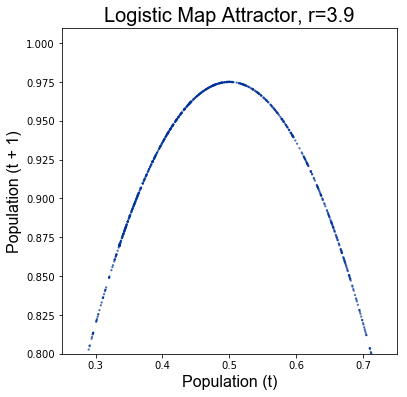

In [26]:
# draw a phase diagram for 2,000 generations for the growth rate parameter 3.9
# the plot reveals the strange attractor - the logistic map is chaotic when r=3.9
pops = simulate(num_gens=2000, rate_min=3.9, num_rates=1)
phase_diagram(pops, xmin=0.25, xmax=0.75, ymin=0.8, ymax=1.01, size=20, title='Logistic Map Attractor, r=3.9')

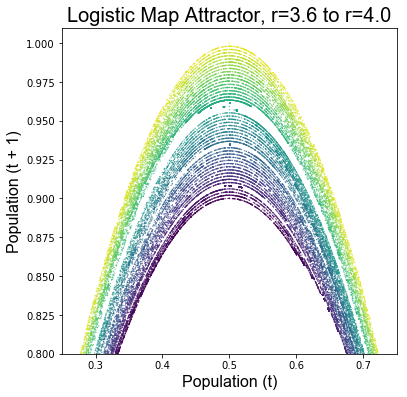

In [27]:
# draw a phase diagram for 2,000 generations across 50 growth rate steps from 3.6 to 4.0
# each chaotic growth rate has its own parabola
pops = simulate(num_gens=2000, rate_min=3.6, rate_max=4.0, num_rates=50)
phase_diagram(pops, xmin=0.25, xmax=0.75, ymin=0.8, ymax=1.01, size=7, 
              title='Logistic Map Attractor, r=3.6 to r=4.0', color='viridis')

In [28]:
#######################33
############################   chaos vs randomness

In [29]:
# sometimes it is hard to tell if a time series is chaotic or random
# generate two time series of 1,000 steps, one chaotic and one random
# generate 30,000 time steps for the chaotic series but only keep the final 1,000 (when system is fully evolved)
total_gens = 30000
gens = 1000
np.random.seed(1)

chaos_pops = simulate(num_gens=total_gens, rate_min=3.99, num_rates=1)
chaos_pops = chaos_pops.iloc[total_gens-gens:].reset_index().drop(labels='index', axis=1)

random_pops = pd.DataFrame(np.random.random(gens), columns=['value'])
time_series = pd.concat([chaos_pops, random_pops], axis=1)
time_series.columns = ['chaos', 'random']
time_series.head()

,chaos,random
0,0.900520,0.417022
1,0.357438,0.720324
2,0.916407,0.000114
3,0.305654,0.302333
4,0.846796,0.146756


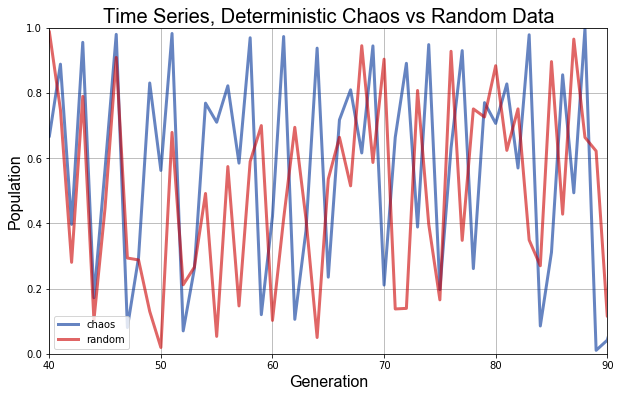

In [30]:
# plot the chaotic and random time series to show how they are sometimes tough to differentiate
ax = time_series.plot(kind='line', figsize=[10, 6], linewidth=3, alpha=0.6, style=['#003399','#cc0000'])
ax.grid(True)
ax.set_xlim(40, 90)
ax.set_ylim(0, 1)
ax.set_title('Time Series, Deterministic Chaos vs Random Data', fontproperties=title_font)
ax.set_xlabel('Generation', fontproperties=label_font)
ax.set_ylabel('Population', fontproperties=label_font)
ax.legend(loc=3)

save_fig('chaos-vs-random-line')
plt.show()

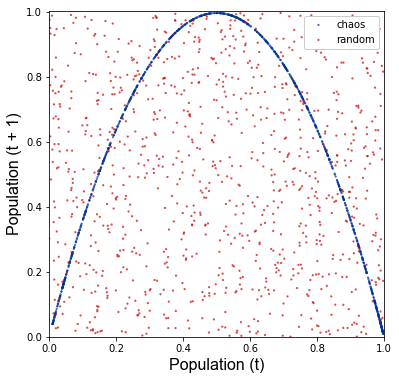

In [31]:

# plot same data as 2D phase diagram instead
pops = pd.concat([chaos_pops, random_pops], axis=1)
pops.columns = ['chaos', 'random']
phase_diagram(pops, size=20, color=['#003399','#cc0000'], ymax=1.005, legend=True, 
              filename='logistic-attractor-chaos-random')

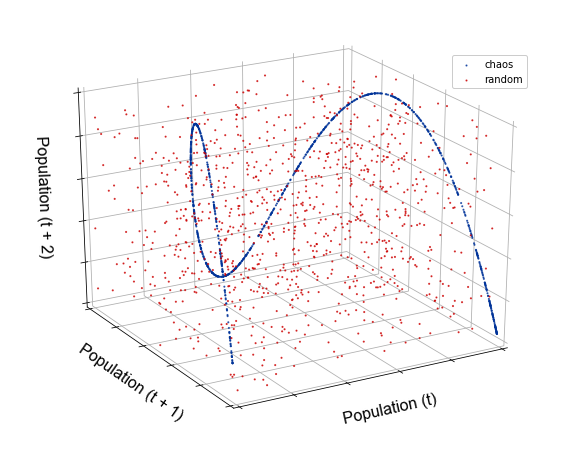

In [32]:
# plot same data as 3D phase diagram instead
phase_diagram_3d(pops, color=['#003399','#cc0000'], filename='logistic-attractor-chaos-random-3d',
                 legend=True, legend_bbox_to_anchor=(0.94, 0.9))

In [33]:
######animación?  

In [34]:
# here's an example of the animated phase diagrams that I create in pynamical-demo-3d-animation.ipynb
IPdisplay.Image(url='images/phase-animate/05-logistic-3d-phase-diagram-chaotic-regime.gif')